In [55]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import rand, randn

## Random Variables and Expected Value

Correlation is a concept deeply rooted in statistics. For this reason, a quick exploration of statistics concepts may be useful for familiarity with concepts presented in this notebook. S random variable $X: \Omega \to \R$ represents a map of possible outcomes $\Omega$ of an event into a set of numbers $\R$. The textbook example would be a coin toss, where the possible outcomes are $\Omega = \{heads, tails\}$, for an outcome $\omega$, $X$ could be 
$X = \begin{cases} 0 & \omega = heads\\ 1 & \omega = tails \end{cases}$

The expected value $\mathbb{E}[\cdot]$ is an operator which acts on random variables. The interpretation for this idea is that when $\mathbb{E}[\cdot]$ acts upon a random varible, it returns the mean of our distribution of probability. For different types of random variables, $\mathbb{E}[\cdot]$ has different definitions, but for our purposes its only necessary to know that the expectation is a linear operator, that is,
$$\mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y].$$

# Correlation: Finding Trends
It is often useful to infer whether or not random variables are related to each other
via correlation. For example, height and weight are quantities that present positive
correlation for the human population. However, happiness and height are uncorrelated.
There are measures other than correlation to detect similarities among variables, such
as the mutual information, but correlation is simple and yet very useful. But correlation helps to indicate trends such as one quantity increasing when another one decreases. The correlation C for two complex-valued random variables X and Y is defined as $C = cor(X, Y) = \mathbb{E}[XY^∗]$, where $^∗$ denotes the complex conjugate.

Its said that if two random variables are uncorrelated, then
$$\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y].$$

## Autocorrelation Function
Autocorrelation functions are extension of the correlation concept to signals. There are different definitions for the autocorrelation function, depending on the signal under analysis. In this text, we will focus on the autocorrelation function(ACF) of finite-duration discrete-time signals, though many of the explored ideas can be extrapolated to other definitions.

$$\hat{R}_X[i] = \sum_{n=i}^{N-1} x[n]x[n-i],$$
As an alternative to use expressions more similar to the ones for signals with infinite
duration, the (unscaled or not normalized) autocorrelation can be expressed as

$$\sum_{n}^{}x[n+i]x^*[n], \quad i = -(N-1), \ldots, -1, 0, 1, \ldots, N-1$$

and computed assuming a zero value for x[n] when its index is out of range. This corresponds to assuming the signal is extended with enough zeros (zero-padding) to the right and to the left. For example, assuming $x[n] = \delta[n] + 2\delta[n − 1] + 3\delta[n − 2]$, which
can be represented by the vector $[1, 2, 3]$, its autocorrelation would be $[3, 8, 14, 8, 3]$, for the lags $i = −2, −1, 0, 1, 2$, respectively. 

Notice that for each value of i, the  corresponding value of the correlation is equivalent to a scalar product between $x[n]$  and it's shifted version $x[n-i]$. Since the scalar product indicates similarity between vectors, the ACF can be interpreted as testing, through the scalar product, the similarity between a list and a shifted version of itself, peaking when the delayed list is most similar to its original version.


From the definition presented, we can come up with a simple implementation for the correlation of two arrays. Notice that the output has indexes $i = 0,1,2 \ldots$ which is not the case for every software implementation.

In [3]:
# Some signal
x = [2,3,4,5]
N = len(x)
# Initialize an array to hold the values
Rx = np.zeros(N)
# Iterate over each value of i
for i in range(N):
    # Calculate the sum
    for n in range(i,N):
        Rx[i] +=x[n]*x[n-i]
# Results
print("x =", x)
print("Rx =", Rx)

x = [2, 3, 4, 5]
Rx =  [54. 38. 23. 10.]


Note that the number of products decreases as $|i|$ increases. More specifically, when computing $R_{X} [i]$ there are only $N − |i|$ “valid” products. To cope with that, the normalized definition is 
$$R_X[i] = \frac{1}{N - |i|} \sum_{n} x[n + i]x^*[n], \quad i = -(N - 1), \ldots, N - 1$$
Another observation of interest is that for real signals, $R_{X} [\tau] = R_{X} [\tau]$. In general, for complex-valued signals, $R_{X} [\tau] = R^*_{X} [-\tau]$, which is called Hermitian symmetry.

In practical applications, the correlation is calculated by some software tool. follows an example for numpy's correlate function. Notice how it now has indices $i = \ldots -1, 0, 1 \ldots$

In [13]:
np_Rx = np.correlate(x,x, mode='full')
# np.correlate returns values for negative indexes, generate n axis
n = np.arange(2*len(x)-1) - (2*len(x)-1)//2
# Print with negative indexes
print("Rx =",np_Rx)
print("n =", n)

Rx = [10 23 38 54 38 23 10]
n = [-3 -2 -1  0  1  2  3]


We can compare the result from our formula with the library implementation by simply truncating the negative indexes, another approach would be using the symmetry of the correlation to extend the outputs of our formula.

In [15]:
# Print definition result
print("Our result:")
print("Rx =", Rx)
# Print library's result
print("np.correlate result:")
print("Rx =",np_Rx[len(np_Rx)//2:])

Our result:
Rx = [54. 38. 23. 10.]
np.correlate result:
Rx = [54 38 23 10]


In [23]:
# Now we can wrap this implementation in a short function
def acorr(x):
    return np.correlate(x,x, mode='full'), np.arange(2*len(x)-1) - (2*len(x)-1)//2

## Power of a Sum of Uncorrelated Signals
For a signal $y[n] = x[n] + z[n]$, it's true that $R_y[l] = R_x[l] + R_z[l]$ if $x[n]$ and $z[n]$ are uncorrelated, that is, $R_{xz}[l] = \mathbb{E}[x[n+l]z[n]] = 0, \forall l$. This can be demonstrated as.
\begin{align*}
R_y[l] &= \mathbb{E}[y[n+l]y[n]]\\
       &= \mathbb{E}[(x[n+l]+z[n+l])(x[n]+z[n])]\\
       &= R_x[l] + R_zx[l]+R_xz[l] + R_z[l]\\
       &= R_x[l] + R_z[l]
\end{align*}
Now, from the equation for the ACF, we have
$$R_X[i] = \sum_{n=i}^{N-1} x[n]x[n-i]$$
for $i = 0$
$$R_X[0] = \sum_{n=0}^{N-1} x[n]^2 = \mathcal{E}_X$$
where $\mathcal{E}_X$ is the energy of the signal, finally
$$\mathcal{E}_y = \mathcal{E}_x + \mathcal{E}_z$$

An application of the previous result arises in the following case. Consider a periodic signal contaminated by white noise - which has autocorrelation function equal to an impulse at the origin - such that they are uncorrelated. The following cell generates such example, the topmost plot represents a wide view of the signal, while the bottom plot represents a closer look, in both cases, its difficult notice some periodicity in $y[n]$

<StemContainer object of 3 artists>

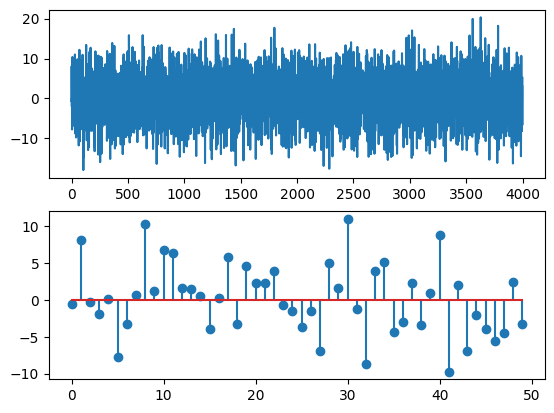

In [33]:
A = 4 # Cosine's amplitude
noise_power = 25 # Power for the noise
f = 2 # Cosine's frequency
Fs = 20 # "Sampling" frequency
W = 2*np.pi*f/Fs

n = np.arange(4000)
# Generate a periodic signal
x = A*np.cos(W*n)
# Generate noise
z = np.sqrt(noise_power)*randn(len(x))

y = x+z

plt.subplot(211)
plt.plot(y)
# Observe a window of the signal
plt.subplot(212)
plt.stem(y[:50])

We can see that the contaminated signal looks mostly like noise, being it difficult to point that the original is actually a periodic sinusoid, now lets take a look at its autocorrelation function

Text(0, 0.5, 'Ry[l]')

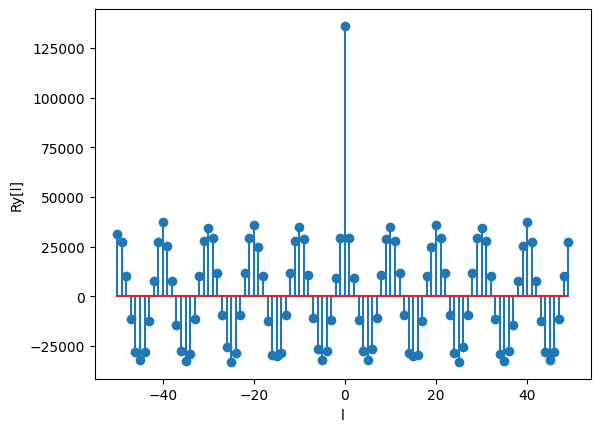

In [32]:
Ry, n = acorr(y)

# Define a boundary tanking into account Ry has negative indexes
l_boundary = len(Ry)//2 - 50
r_boundary = len(Ry)//2 + 50
n_window = n[l_boundary:r_boundary]
Ry_window = Ry[l_boundary:r_boundary]
# Plot only a window of
plt.stem(n_window, Ry_window)
plt.xlabel("l")
plt.ylabel("Ry[l]")

Now it becomes clear that our original signal was periodic, since its correlation is as well periodic, and the white noise contributes only to the huge spike resembling an impulse at the origin. Since we know $x[n]$ and $z[n]$, we can also vizualize their ACF and confirm that the ACF of $y[n]$ looks like a sum of both.

<StemContainer object of 3 artists>

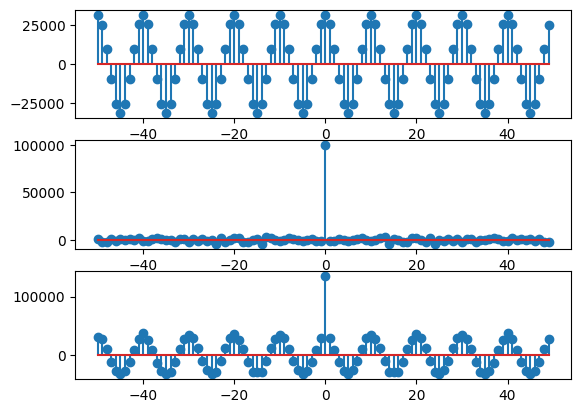

In [36]:
# Plot sinusoid's ACF
plt.subplot(311)
Rx, n = acorr(x)
plt.stem(n_window,Rx[l_boundary:r_boundary])
# Plot noise's ACF
plt.subplot(312)
Rz, n = acorr(z)
plt.stem(n_window,Rz[l_boundary:r_boundary])
# Plot x's ACF
plt.subplot(313)
plt.stem(n_window, Ry_window)



## Cross-correlation
The cross-correlation function (also called correlation) is very similar to the ACF but
uses two distinct signals, being defined for discrete time energy signals as
$$R_{xy}[l] = \sum_{n=-\infty}^{\infty} x[n + l]y^*[n] = \sum_{n=-\infty}^{\infty} x[n]y^*[n - l]
$$
Note the adopted convention with respect to the complex conjugate.
Some important properties of the cross-correlation are:

* $R_{xy}[\tau] = R^*_{xy}[−\tau ]$(Hermitian symmetry),
* $R_{xy}[\tau] = R∗_{yx}[−\tau ]$ (swapping arguments is also Hermitian),
* $|R_{xy}[\tau]| ≤\sqrt{R_{xx}[0]R_{yy}[0]}$, (maximum is not necessarily at τ = 0 but is bounded).

Just like the autocorrelation, the cross-correlation can be implemented following from its definition, but now we'll directly declare a function using numpy's correlate function as a base.

In [59]:
# Implementation of cross-correlation
def xcorr(x,y):
    # In case none of the conditions are true, either gives a valid n
    n = np.arange(2*len(x)-1) - (2*len(x)-1)//2
    # Zero-pad signals
    if len(x) > len(y):
        y = np.concatenate((y,np.zeros(len(x)-len(y))))
        n = np.arange(2*len(x)-1) - (2*len(x)-1)//2
    elif len(y) > len(x):
        x = np.concatenate((x,np.zeros(len(y)-len(x))))
        n = np.arange(2*len(y)-1) - (2*len(y)-1)//2
    return np.correlate(x,y,mode='full'), n

## Cross-correlation for Synchronization of Signals
Assume a discrete-time sinal $x[n]$ is transmitted through acommunication channel and the receiver obtains a delayed and distorted version $y[n]$. The task is to estimate the delay imposed by the channel. The transmitter does not “stamp” the time when the transmission starts, but uses a predefined preamble sequence $p[n]$ that is known by the receiver. The receiver will then guess the beginning of the transmitted message by searching for the preamble sequence in $y[n]$ via cross-correlation. Modern modulation schemes employ more complicated sequences and techniques, but these are still based on the correlation.

Correlation peak: 14.0
Estimated delay (in samples): -3


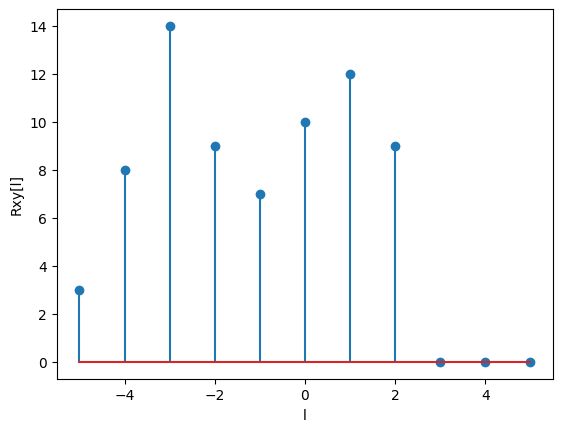

In [52]:
# Declare x
x = np.arange(1,4)
# Declare y
y = np.concatenate((np.arange(3,0,-1),x))

# Take the correlation
c, lags = xcorr(x,y)
# Plot
plt.stem(lags,c)
plt.xlabel("l")
plt.ylabel("Rxy[l]")
# Find the peak of the correlation
L = lags[np.argmax(c)]
# Print correlation peak
print("Correlation peak:",np.max(c))
# Print estimated delay
print("Estimated delay (in samples):",L)


It should be noticed that the cross-correlation is far from perfect with respect to
capturing similarity between waveforms. For example, if $y[n]$ is changed to y = np.concatenate((np.arange(4,0,-1),x)), the previous commands would indicate the best lag as L = 1. The reader is invited
to play with simple signals and find more evidence of this limitation. As a rule of
thumb, the cross-correlation will work well if one of the signals is a delayed version of
the other, without significant distortion. However, in situations such as reverberant
rooms where one of the signals is composed by a sum of multi-path (with distinct
delays) versions of the other signal, more sophisticated techniques should be used.

Another aspect is that, in some applications, the best similarity measure is the
absolute value of the cross-correlation. For example, this is the case when $x[n]$ can be compared
either to $y[n]$ or $−y[n]$.

The following cell illustrates the delay estimation between two signals $x[n]$ and $y[n]$. The
vector y, representing $y[n]$, is obtained by delaying x and adding Gaussian noise to have
a given SNR

The added delay was: 0.25
The estimated delay was: -0.25


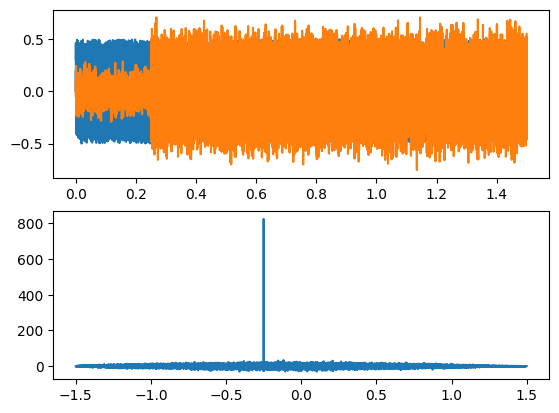

In [68]:
Fs = 8000
Ts = 1/Fs
N = int(1.5*Fs)
t = np.arange(N)*Ts
# Change the condition to obtain a different result
if True:
    # Zero mean uniformly distributed
    x = rand(N) - 0.5
else:
    # Cosine
    x = cos(2*pi*100*t)

# Define a delay
delay_in_samples = 2000
# Find delay's value in seconds
time_delay = delay_in_samples*Ts

# Delay signal
y = np.concatenate((np.zeros(delay_in_samples),x[:len(x) - delay_in_samples]))

# Generate noise
SNRdb = 10
signal_power = np.mean((x**2))
noise_power = signal_power/(10**(SNRdb/10))
noise = np.sqrt(noise_power)*randn(len(y))
# Add noise to signal
y = y+noise

plt.subplot(211)
# Plot the original signal
plt.plot(t,x)
# Plot the delayed and noise-contaminated signal
plt.plot(t,y)
# Take the correlation
c, lags = xcorr(x,y)

plt.subplot(212)
# Plot correlation
plt.plot(lags*Ts,c)
# Estimate delay, in this context the absolute value is the best measurement
L = lags[np.argmax(np.abs(c))]
estimated_time_delay = L*Ts
print("The added delay was:",time_delay)
print("The estimated delay was:", estimated_time_delay)

In both examples, the x-axis has seconds as units. Notice that our estimated delay has a negative signal, since we took the correlation $R_{XY}$. This indicates that x is 0.25 seconds behind y, which implies y is delayed by 0.25 seconds with respect to x, fitting our expected result.

After running the code as it is, observe what happens if x=rand(N), i. e., use a signal with a mean different than zero (0.5, in this case). In this case, the correlation is affected in a way that the peak indicating the delay is less pronounced. Another test is to use a cosine (modify the if) with delay_in_samples assuming a small value with respect to the total length N of the vectors. The estimation can fail, indicating the delay to be zero. Another parameter to play with is the SNR. Use values smaller than 10 dB to visualize how the correlation can be useful even with negative SNR.

It is important to address another issue: comparing vectors of different length. Assume two signals $x[n]$ and $y[n]$ should be aligned in time and then compared sample-by-sample, for example to calculate the error $x[n] − y[n]$. There is a small problem if the vectors have a different length. Assuming that xcorr(x,y) indicated the best lag is positive (L > 0), an useful post-processing for comparing $x[n]$ and $y[n]$ is to delete samples of $x[n]$. If L is negative, the first samples of $y[n]$ can be deleted. Such is demonstrated next

Text(0.5, 1.0, 'Error Between Aligned x and y')

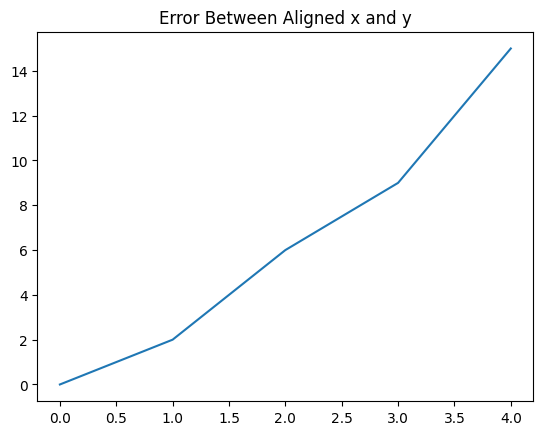

In [70]:
# Declare x
x =np.array([1, -2, 3, 4, 5, -1])
# Declare y
y =np.array([3, 1, -2, -2, 1, -4, -3, -5, -10])
# Find correlation
c , lags = xcorr (x , y )

L = lags[np.argmax(np.abs(c))]

if L > 0:
    # Delete the first L samples
    x = x[L:]
else:
    # Delete the first L samples
    y = y[-L:]

if len(x) > len(y):
    # Truncate if necessary
    x = x [:len(y)]
else:
    # Truncate if necessary
    y = y [: len(x) ] 
plt.plot (x - y )
plt.title ( "Error Between Aligned x and y")